In [5]:
! pip install git+https://github.com/hiive/hiivemdptoolbox.git
! pip install pymdptoolbox
! pip install gym==0.17.3

  Cloning https://github.com/hiive/hiivemdptoolbox.git to c:\users\tank2\appdata\local\temp\pip-req-build-kn1_lxe3
  Resolved https://github.com/hiive/hiivemdptoolbox.git to commit dd44587196f698ecbe34ab51eed3b13051e82c1b
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/hiive/hiivemdptoolbox.git 'C:\Users\tank2\AppData\Local\Temp\pip-req-build-kn1_lxe3'

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import mdptoolbox, hiive.mdptoolbox.example

In [2]:
gamma = [0.5,0.7,0.9]
epsilon = [10**-30, 10**-20, 10**-15, 10**-5]
def iter_gamma(P,R,type):
    v=[]
    p=[]
    iter=[]
    time=[]
    for i in gamma:
        if type == 0:
            mdp = mdptoolbox.mdp.ValueIteration(P,R,i, epsilon=epsilon[0])
        else:
            mdp = mdptoolbox.mdp.PolicyIterationModified(P,R,i, epsilon= epsilon[0])
        mdp.run()
        v.append(np.mean(mdp.V))
        p.append(mdp.policy)
        iter.append(mdp.iter)
        time.append(mdp.time)
    return [v,iter,time,p]

def iter_epsilon(P,R,type):
    v=[]
    p=[]
    iter=[]
    time=[]
    for e in epsilon:
        if type == 0:
            mdp = mdptoolbox.mdp.ValueIteration(P,R,0.9, epsilon=e)
        else:
            mdp = mdptoolbox.mdp.PolicyIterationModified(P,R,0.9,epsilon=e)

        mdp.run()
        v.append(np.mean(mdp.V))
        p.append(mdp.policy)
        iter.append(mdp.iter)
        time.append(mdp.time)
    return [v,iter,time,p]

def plot_iter(x,y, type=2):
    titles = ['Avg Reward vs Discount Rate', 'Iteration vs Discount Rate', 'Converged Time  vs Discount Rate']
    labels = ['Value Iteration', 'Policy Iteration']
    ylabes = ['Avg Reward','Iteration','Time']
    if type != 2:
        labels = [labels[type]]
    for i in range(len(titles)):
        plt.figure()
        plt.title(titles[i])
        for j in range(len(labels)):
            # if type == 0 or type == 1:
            #     plt.plot(x, y[i], label = labels[j])
            # else:
            plt.plot(x, y[j][i], label = labels[j])
            plt.xlabel("Discount Rate")
            plt.ylabel(ylabes[i])
        plt.legend(loc="best")

def plot_ep(x,y, type=2):
    titles = ['Avg Reward vs Epsilon(stop criteria)', 'Iteration vs Epsilon(stop criteria)', 'Converged Time  vs Epsilon(stop criteria)']
    labels = ['Value Iteration', 'Policy Iteration']
    ylabes = ['Avg Reward','Iteration','Time']
    if type != 2:
        labels = [labels[type]]
    for i in range(len(titles)):
        plt.figure()
        plt.title(titles[i])
        for j in range(len(labels)):
            # if type == 0 or type == 1:
            #     plt.plot(x, y[i], label = labels[j])
            # else:
            plt.plot(x, y[j][i], label = labels[j])
            plt.xlabel("Epsilon")
            plt.ylabel(ylabes[i])
        plt.legend(loc="best")

decays = [0.65,0.75,0.85,0.95]
learning_rates = [0.4,0.5,0.6,0.7,0.8,0.9]
iter_size = 100000
def q_iter_decay(P,R):
    v=[]
    p=[]
    s_rate = []    
    for decay in decays:
        q = hiive.mdptoolbox.mdp.QLearning(P, R, 0.9, epsilon=1.0, epsilon_decay=decay, skip_check=True)
        # q.max_iter=iter_size
        q.run()
        p.append(q.policy)
        v.append(np.mean(q.V))
        q=q.run_stats
        r=[]
        for i in q:
            r.append(i['Reward'])            
        s_rate.append(np.count_nonzero(r)/len(r)*100)
    plt.title("Q Learning: Avg Reward vs Epsilon decay")
    plt.xlabel("Epsilon Decay")
    plt.ylabel("Average Reward")
    plt.plot(decays, v)
    # return [v,p,s_rate]

def q_iter_alpha(P,R):
    v=[]
    p=[]
    s_rate = []
    for lrate in learning_rates:
        q = hiive.mdptoolbox.mdp.QLearning(P, R, 0.9, epsilon=1.0, epsilon_decay=0.95, skip_check=True, alpha=0.1, alpha_decay=lrate)
        # q.max_iter=iter_size
        q.run()
        p.append(q.policy)
        v.append(np.mean(q.V))
        r=[]
        q=q.run_stats
        for i in q:
            r.append(i['Reward'])
        s_rate.append(np.count_nonzero(r)/len(r)*100)

    plt.title("Q Learning: Avg Reward vs Learning Rate Decay")
    plt.xlabel("Learning rate Decay")
    plt.ylabel("Average Reward")
    plt.plot(learning_rates, v)
    

    # return [v,p,s_rate]

In [3]:
P_20, R_20 = hiive.mdptoolbox.example.forest(S=20)
P_500, R_500 = hiive.mdptoolbox.example.forest(S=500)

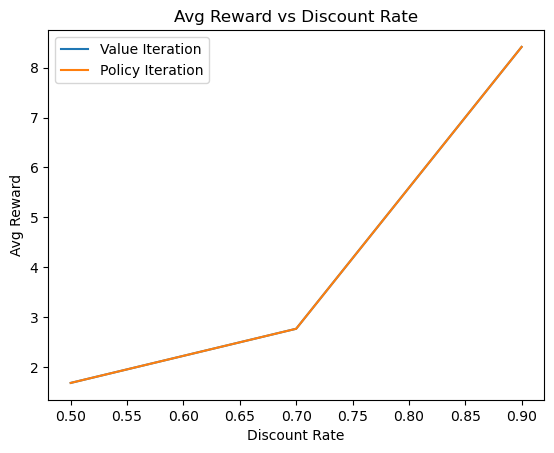

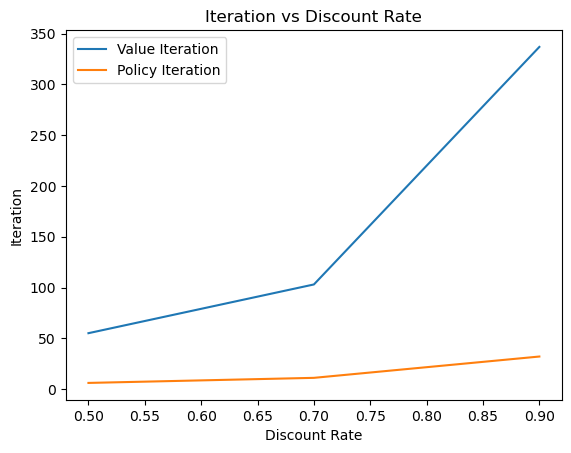

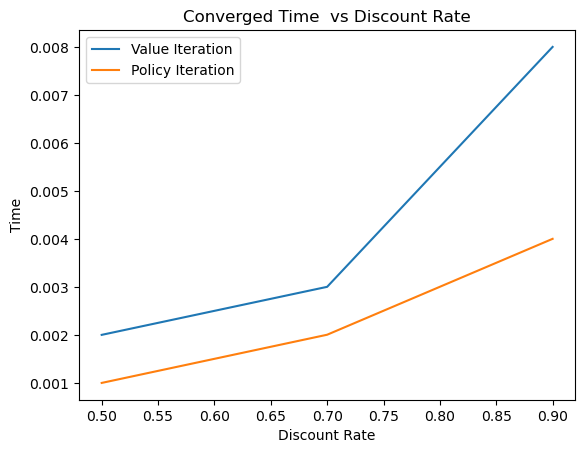

In [37]:
vi_gamma_report = iter_gamma(P_20,R_20,0)
pi_gamma_report = iter_gamma(P_20,R_20,1)
plot_iter(gamma,[vi_gamma_report[:3],pi_gamma_report[:3]],2)

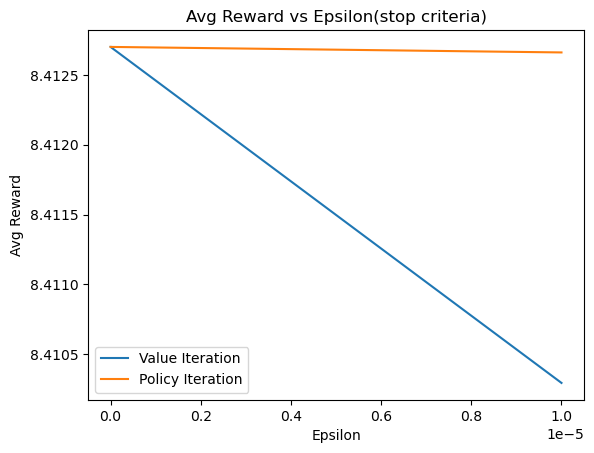

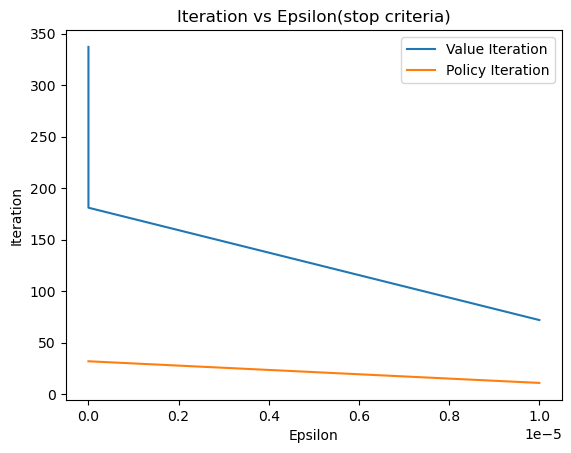

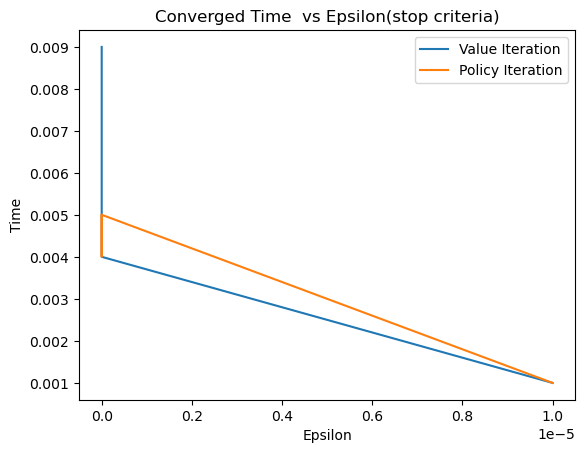

In [38]:
vi_ep_report = iter_epsilon(P_20,R_20,0)
pi_ep_report = iter_epsilon(P_20,R_20,1)
plot_ep(epsilon,[vi_ep_report[:3],pi_ep_report[:3]],2)

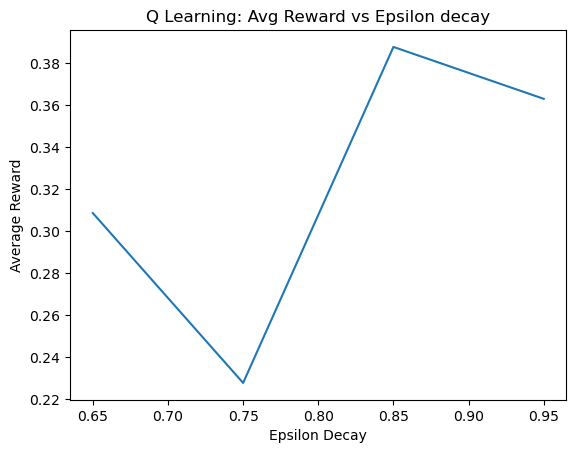

In [39]:
q_decay_result = q_iter_decay(P_20,R_20)

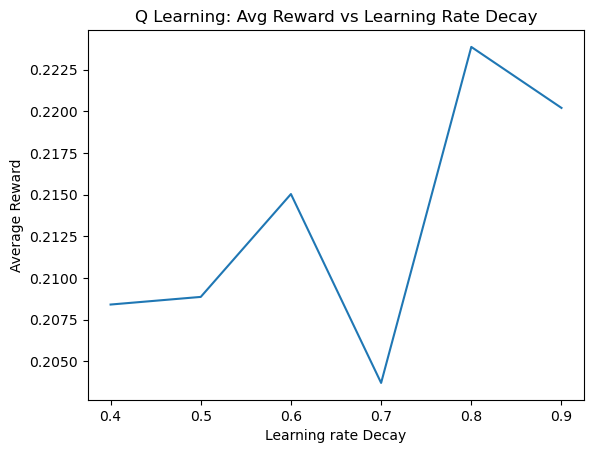

In [40]:
q_alpha_result = q_iter_alpha(P_20,R_20)

# Qlearning Converge

In [41]:
def compare_all(P,R,e_decay=1-10**-5, a_decay=1-10**-7.5, m_iter=100000):
    v = mdptoolbox.mdp.ValueIteration(P,R,0.9, epsilon=10**-30)
    p = mdptoolbox.mdp.PolicyIterationModified(P,R,0.9, epsilon= 10**-30)
    q = hiive.mdptoolbox.mdp.QLearning(P, R, 0.9, epsilon=1.0, epsilon_decay=e_decay, alpha=0.1, alpha_decay= a_decay, skip_check=True)
    # iter = 400000
    q.max_iter=m_iter
    v.run()
    p.run()
    q.run()
    print(f"Average Reward of Value Iteration : {round(np.mean(v.V),5)}")
    print(f"Average Reward of Policy Iteration : {round(np.mean(p.V),5)}")
    print(f"Average Reward of Q Learning : {round(np.mean(q.V),5)}")    
    
    stats = q.run_stats
    qvalue = []
    rewards = []
    errors=[]
    eps=[]
    al=[]
    for i in stats:
        eps.append(i['Epsilon'])
        al.append(i['Alpha'])
        qvalue.append(i['Mean V'])
        rewards.append(i['Reward'])
        errors.append(i['Error'])
    plt.figure()
    plt.title("Epsilon vs Iteration")
    plt.plot(range(m_iter), eps)
    plt.xlabel("Iteration")
    plt.ylabel("Epsilon")
    plt.figure()
    plt.title("Average Reward vs Iteration")
    plt.plot(range(m_iter), qvalue)
    plt.xlabel("Iteration")
    plt.ylabel("Average Reward")    

    return v,p,q

Average Reward of Value Iteration : 8.4127
Average Reward of Policy Iteration : 8.4127
Average Reward of Q Learning : 7.88656


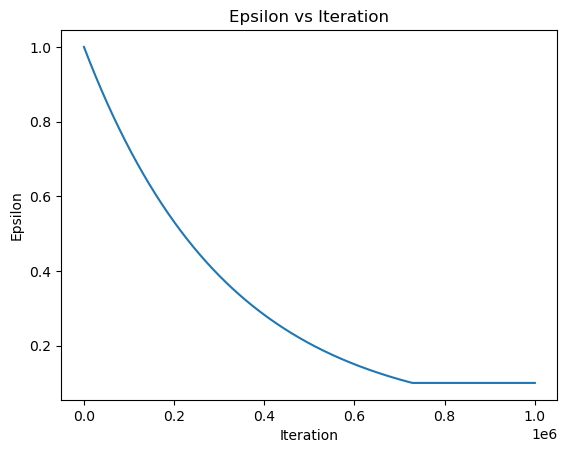

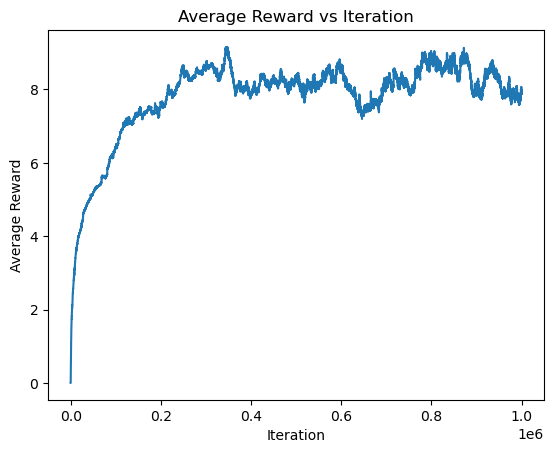

In [42]:
mdps = compare_all(P_20, R_20,e_decay=1-10**-5.5,a_decay=1-10**-7.5, m_iter=1000000)

In [43]:
print(f'VI policy : {mdps[0].policy}')
print(f'PI Policy : {mdps[1].policy}')
print(f'Q Policy : {mdps[2].policy}')

VI policy : (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
PI Policy : (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
Q Policy : (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)


# Forest 500

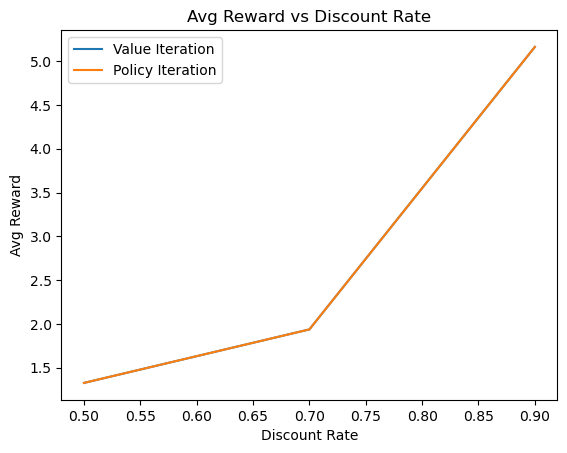

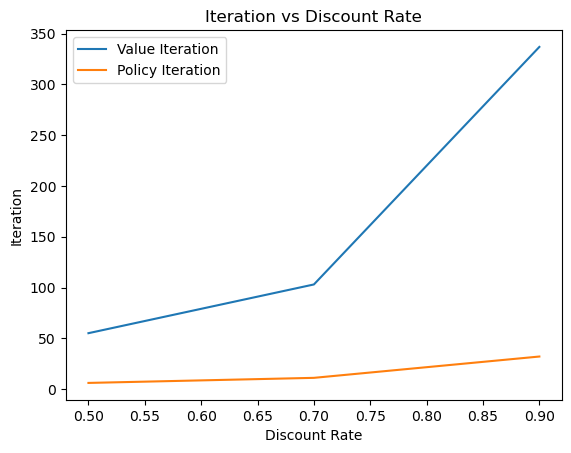

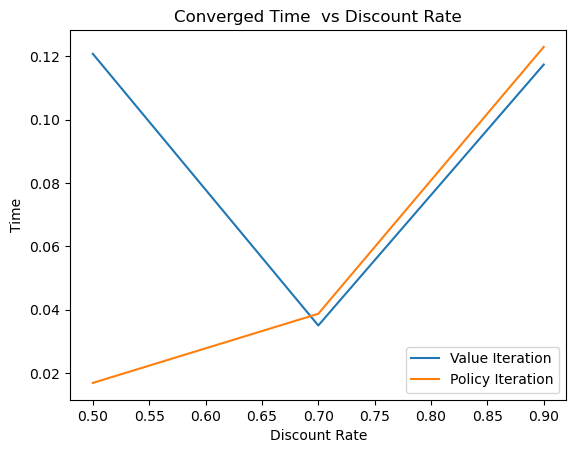

In [44]:
vi_gamma_report = iter_gamma(P_500,R_500,0)
pi_gamma_report = iter_gamma(P_500,R_500,1)
plot_iter(gamma,[vi_gamma_report[:3],pi_gamma_report[:3]],2)

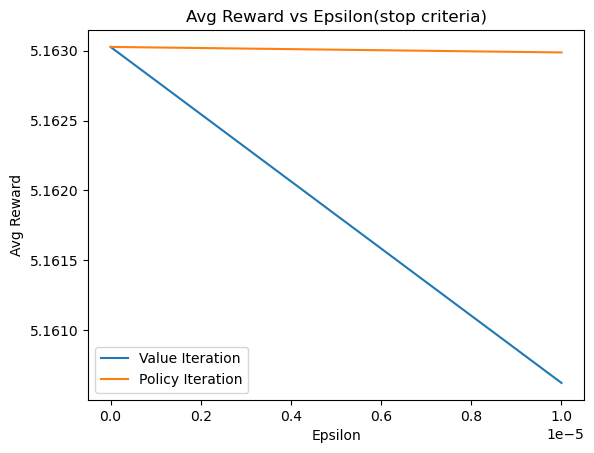

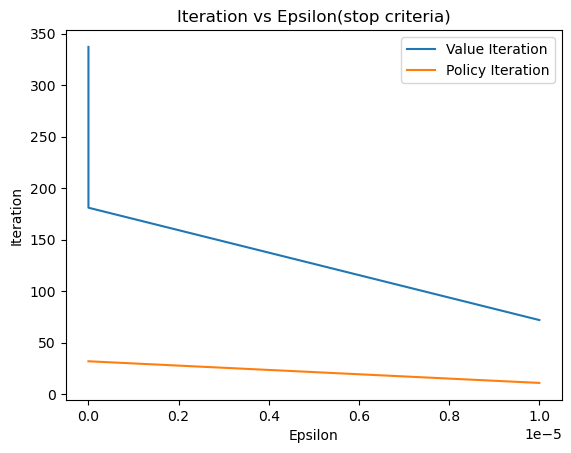

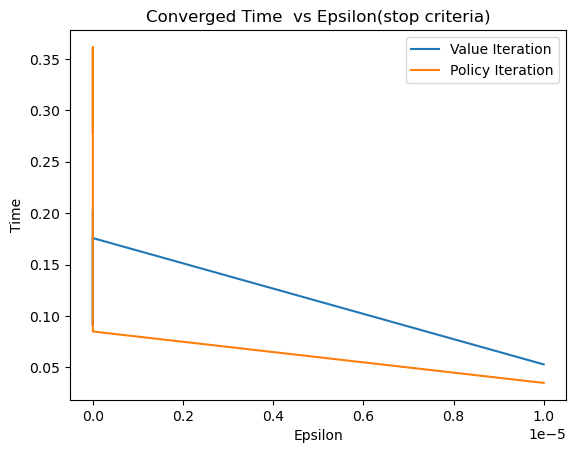

In [45]:
vi_ep_report = iter_epsilon(P_500,R_500,0)
pi_ep_report = iter_epsilon(P_500,R_500,1)
plot_ep(epsilon,[vi_ep_report[:3],pi_ep_report[:3]],2)

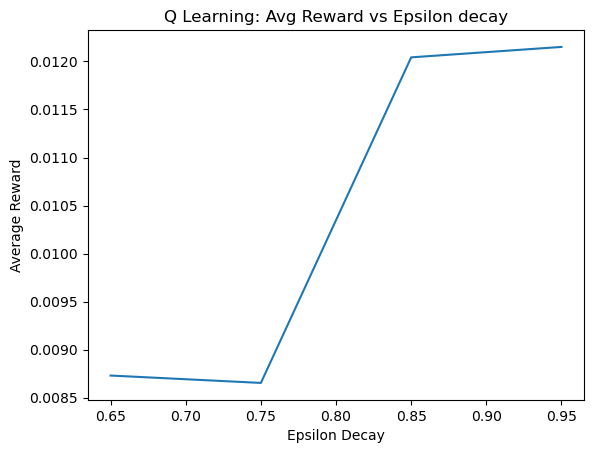

In [46]:
q_decay_result = q_iter_decay(P_500,R_500)

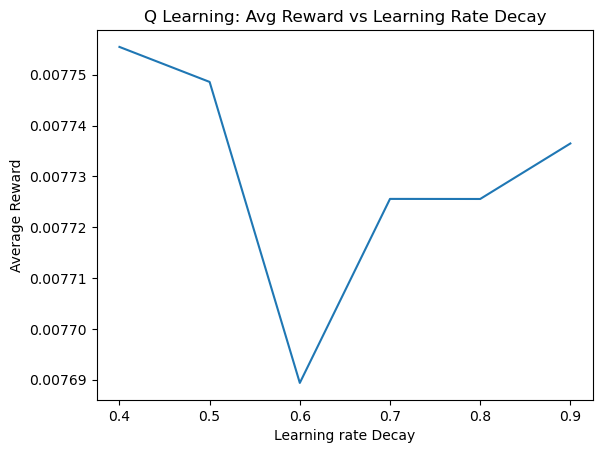

In [47]:
q_alpha_result = q_iter_alpha(P_500,R_500)

Average Reward of Value Iteration : 5.16303
Average Reward of Policy Iteration : 5.16303
Average Reward of Q Learning : 5.08349


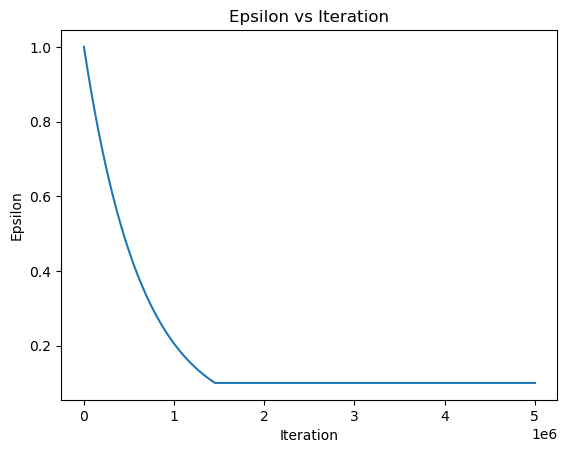

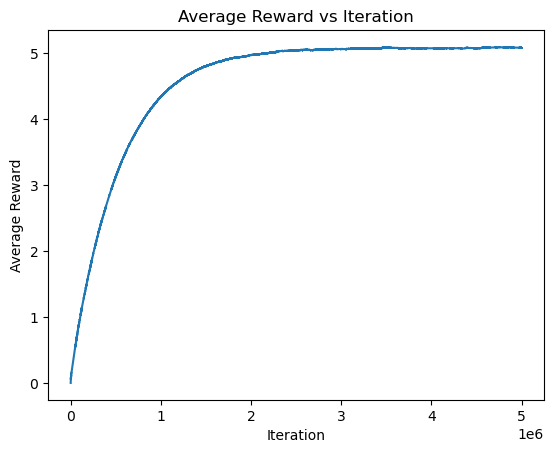

In [48]:
mdps = compare_all(P_500, R_500,e_decay=1-10**-5.8,a_decay=1-10**-10, m_iter=5000000)

In [49]:
print(f'VI policy : {mdps[0].policy}')
print(f'PI Policy : {mdps[1].policy}')
print(f'Q Policy : {mdps[2].policy}')

VI policy : (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [203]:
v = mdptoolbox.mdp.ValueIteration(P_500,R_500,0.9, epsilon=10**-30)
p = mdptoolbox.mdp.PolicyIterationModified(P_500,R_500,0.9, epsilon= 10**-30)
q = hiive.mdptoolbox.mdp.QLearning(P_500, R_500, 0.9, epsilon=1.0, epsilon_decay=1-10**-5.8, alpha=0.1, alpha_decay= 1-10**-10, skip_check=True)
iter = 5000000
q.max_iter=iter

In [30]:
v.run()
p.run()
q.run()

VI policy : (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
PI Policy : (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
Q Policy : (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)


In [31]:
print(f'{np.mean(v.V)}')
print(np.mean(p.V))
print(np.mean(q.V))

8.412700311262665
8.412700311262665
7.904087084809978


In [33]:
print(f'VI policy : {v.policy}')
print(f'PI Policy : {p.policy}')
print(f'Q Policy : {q.policy}')

VI policy : (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
PI Policy : (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
Q Policy : (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)


In [205]:
# print(p.policy)
# print(v.policy)
# print(q.policy)

In [206]:
stats = q.run_stats
qvalue = []
rewards = []
errors=[]
eps=[]
al=[]
for i in stats:
    eps.append(i['Epsilon'])
    al.append(i['Alpha']*10)
    qvalue.append(i['Mean V'])
    rewards.append(i['Reward'])
    errors.append(i['Error'])

Text(0, 0.5, 'Epsilon')

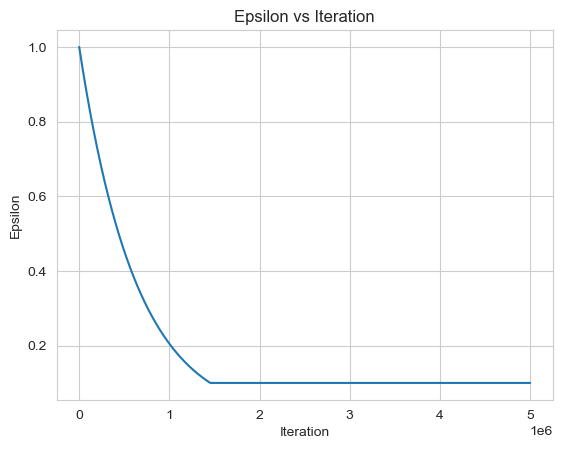

In [213]:
plt.title("Epsilon vs Iteration")
plt.plot(range(iter), eps)
plt.xlabel("Iteration")
plt.ylabel("Epsilon")

Text(0, 0.5, 'Average Reward')

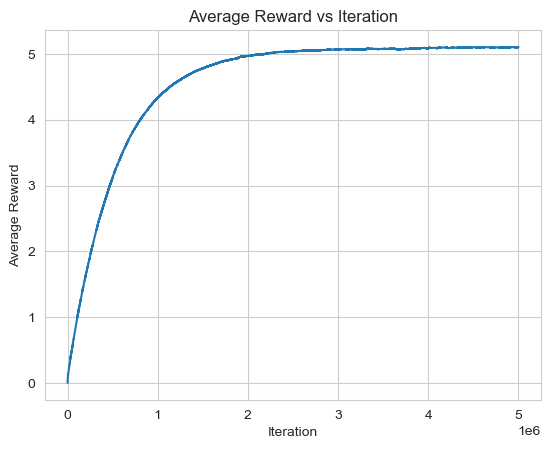

In [214]:
plt.title("Average Reward vs Iteration")
plt.plot(range(iter), qvalue)
plt.xlabel("Iteration")
plt.ylabel("Average Reward")